In [1]:
#loading libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from scipy import stats
from sklearn.metrics import r2_score
%matplotlib inline

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Setting working directory
os.chdir("D:\Data Science edwisor\Projects\Employee Absentism")
os.getcwd()

'D:\\Data Science edwisor\\Projects\\Employee Absentism'

In [3]:
#loading data
df=pd.read_excel('Absenteeism_at_work_Project.xls')

# Understanding the data

In [4]:
# First 5 rows of data
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
# Data Types of all the variables
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [6]:
# Number of Unique values present in each variable
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [7]:
#dimensions of the data
df.shape

(740, 21)

In [8]:
# categorising the variables 
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

# Exploratory Data analysis

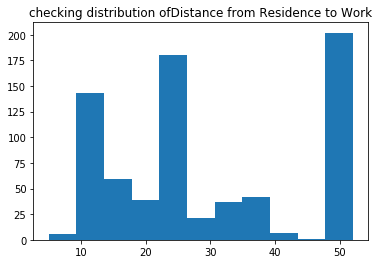

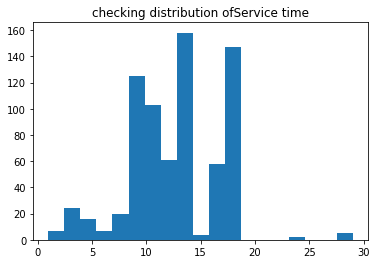

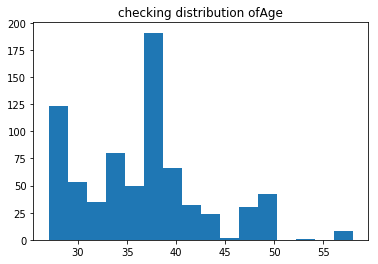

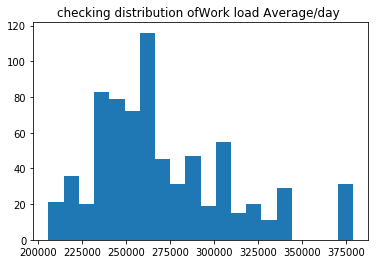

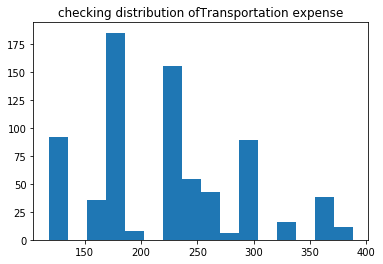

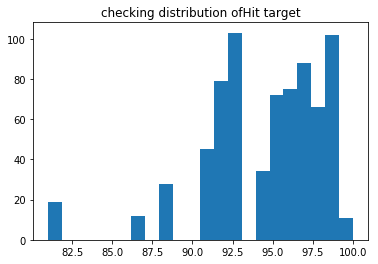

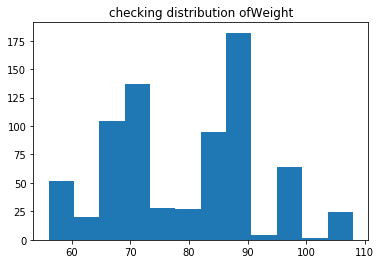

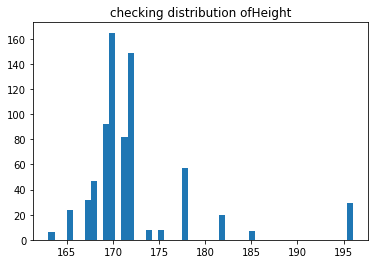

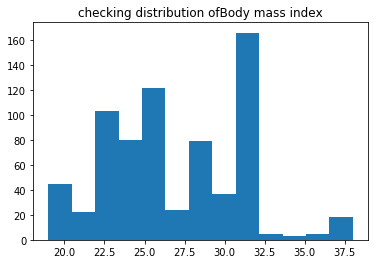

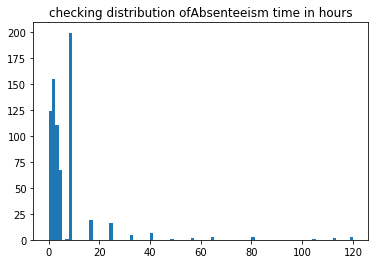

In [9]:
#checking distribution of continuous variables
for i in continuous_vars :
    plt.hist(df[i].dropna(),bins='auto')
    plt.title('checking distribution of' + str(i))
    plt.show()

In [10]:
#checking the mean of Absenteeism time in hours
df['Absenteeism time in hours'].dropna().mean()

6.977715877437326

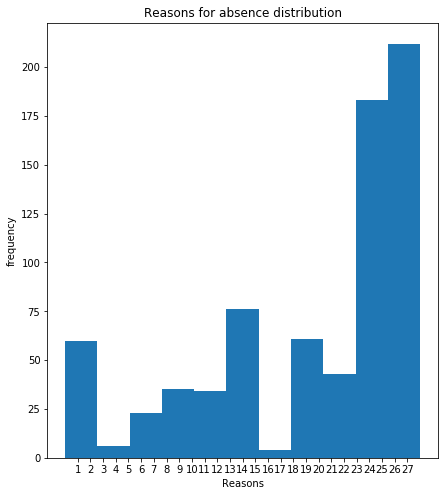

In [11]:
#checking reason for absenteeism
plt.figure(figsize=(7,8))
plt.hist(df['Reason for absence'].dropna(),bins='auto')
plt.xticks(range(1,28))
plt.xlabel('Reasons')
plt.ylabel('frequency')
plt.title('Reasons for absence distribution')
plt.show()
# could see people with dental consultation and physiotherapy tend to be absent more often.

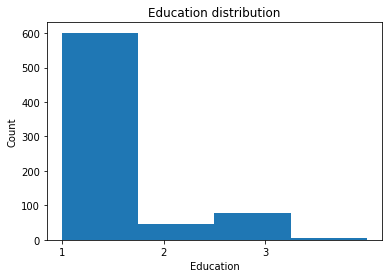

In [12]:
#checking education variable
plt.hist(df['Education'].dropna(),bins=4)
plt.xticks(range(1,4))
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education distribution')
plt.show()


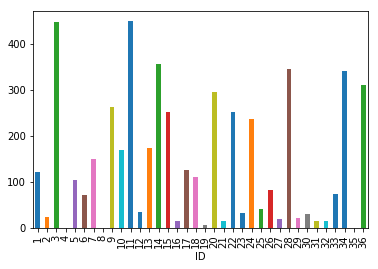

In [13]:
## grouping the data using ID and plotting bar plot
df.groupby('ID').sum()['Absenteeism time in hours'].plot.bar()

Text(0,0.5,'Count')

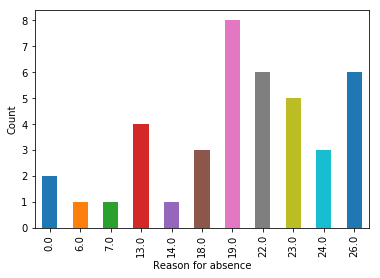

In [14]:
#checking what are reasons for absence of highest absentee (ID=11)
df.iloc[np.where(df['ID']==11)].groupby('Reason for absence').count()['ID'].plot.bar()
plt.ylabel('Count')

Text(0,0.5,'Absenteeism in hours')

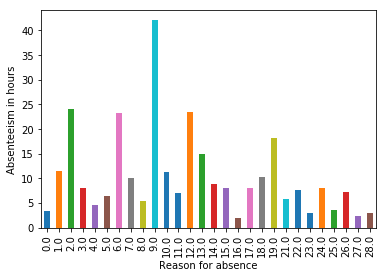

In [15]:
## grouping the data using Reason for absence and plotting bar plot
df.groupby('Reason for absence').mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0,0.5,'Absenteeism in hours')

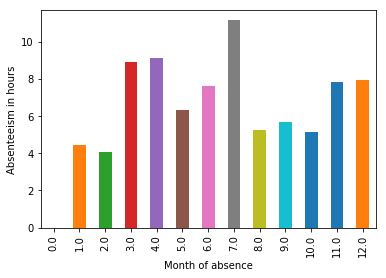

In [16]:
df.groupby(['Month of absence']).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0,0.5,'Absenteeism in hours')

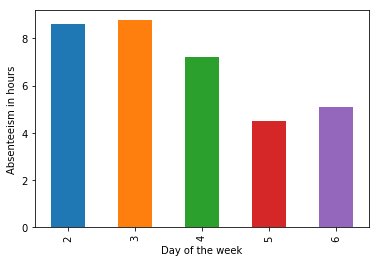

In [17]:
df.groupby(['Day of the week']).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0,0.5,'Absenteeism in hours')

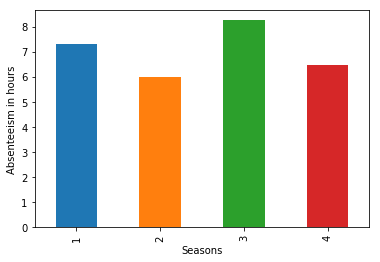

In [18]:
df.groupby(['Seasons']).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0,0.5,'Absenteeism in hours')

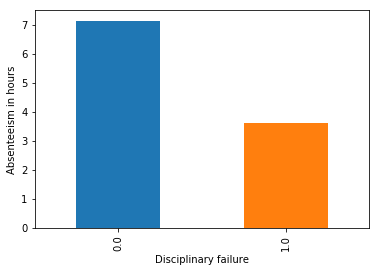

In [19]:
df.groupby([categorical_vars[5]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

In [ ]:
df.groupby([categorical_vars[6]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0,0.5,'Absenteeism in hours')

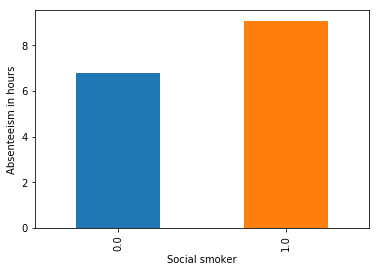

In [20]:
df.groupby([categorical_vars[8]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0,0.5,'Absenteeism in hours')

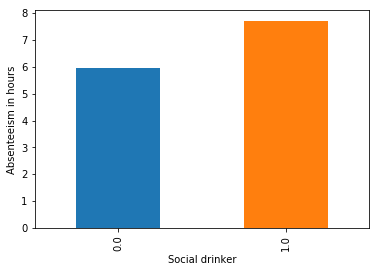

In [21]:
df.groupby([categorical_vars[7]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0,0.5,'Absenteeism in hours')

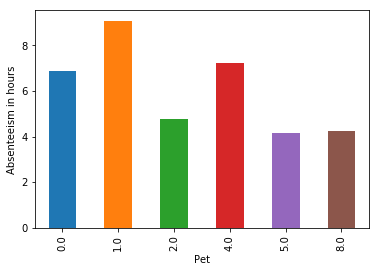

In [22]:
df.groupby([categorical_vars[9]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

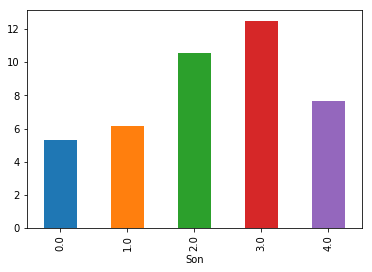

In [23]:
df.groupby([categorical_vars[10]]).mean()['Absenteeism time in hours'].plot.bar()

Text(0,0.5,'Work load Average/day ')

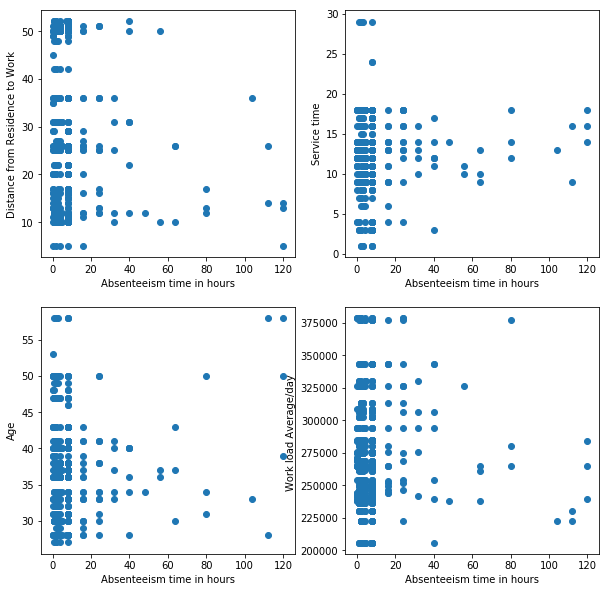

In [24]:
## plotting scatter plot for target variable vs each continuous variable
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axis[0,0].scatter(df['Absenteeism time in hours'],df[continuous_vars[0]])
axis[0,0].set_xlabel('Absenteeism time in hours')
axis[0,0].set_ylabel(continuous_vars[0])
axis[0,1].scatter(df['Absenteeism time in hours'],df[continuous_vars[1]])
axis[0,1].set_xlabel('Absenteeism time in hours')
axis[0,1].set_ylabel(continuous_vars[1])
axis[1,0].scatter(df['Absenteeism time in hours'],df[continuous_vars[2]])
axis[1,0].set_xlabel('Absenteeism time in hours')
axis[1,0].set_ylabel(continuous_vars[2])
axis[1,1].scatter(df['Absenteeism time in hours'],df[continuous_vars[3]])
axis[1,1].set_xlabel('Absenteeism time in hours')
axis[1,1].set_ylabel(continuous_vars[3])

Text(0,0.5,'Height')

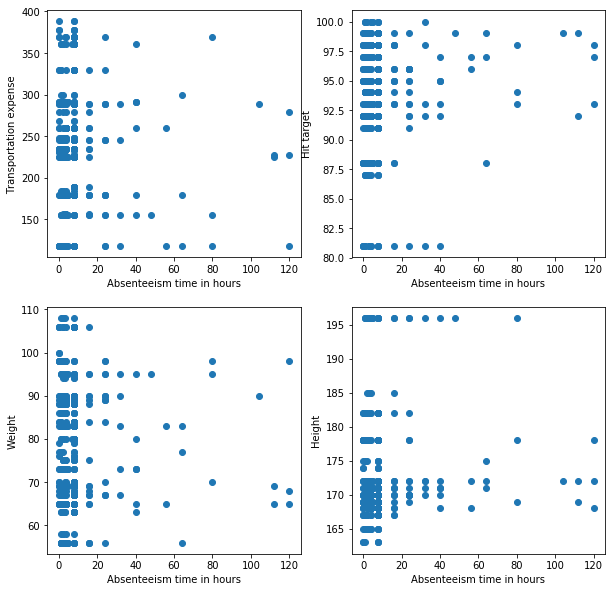

In [25]:
## plotting scatter plot for target variable vs each continuous variable
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axis[0,0].scatter(df['Absenteeism time in hours'],df[continuous_vars[4]])
axis[0,0].set_xlabel('Absenteeism time in hours')
axis[0,0].set_ylabel(continuous_vars[4])
axis[0,1].scatter(df['Absenteeism time in hours'],df[continuous_vars[5]])
axis[0,1].set_xlabel('Absenteeism time in hours')
axis[0,1].set_ylabel(continuous_vars[5])
axis[1,0].scatter(df['Absenteeism time in hours'],df[continuous_vars[6]])
axis[1,0].set_xlabel('Absenteeism time in hours')
axis[1,0].set_ylabel(continuous_vars[6])
axis[1,1].scatter(df['Absenteeism time in hours'],df[continuous_vars[7]])
axis[1,1].set_xlabel('Absenteeism time in hours')
axis[1,1].set_ylabel(continuous_vars[7])

# Missing value analysis

In [27]:
#Creating dataframe with missing values present in each variable
missing_val = pd.DataFrame(df.isnull().sum()).reset_index()

#Renaming variables of missing_val dataframe
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating percentage missing value
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

# Sorting missing_val in Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [28]:
# Droping observation in which "Absenteeism time in hours" has missing value
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
print(df.shape)
print(df['Absenteeism time in hours'].isnull().sum())

(718, 21)
0


In [29]:
df['Body mass index'].iloc[12]

31.0

In [30]:
#create missing value
df['Body mass index'].iloc[12] = np.nan

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.204
Imputing row 101/718 with 1 missing, elapsed time: 0.206
Imputing row 201/718 with 0 missing, elapsed time: 0.208
Imputing row 301/718 with 0 missing, elapsed time: 0.209
Imputing row 401/718 with 0 missing, elapsed time: 0.210
Imputing row 501/718 with 1 missing, elapsed time: 0.211
Imputing row 601/718 with 0 missing, elapsed time: 0.211
Imputing row 701/718 with 0 missing, elapsed time: 0.212


In [32]:
df['Body mass index'].iloc[12]

30.999998833986012

In [33]:
# Checking if all the missing value imputed
df.isnull().sum().sum()

0

# Outlier analysis

Text(0,0.5,'Values')

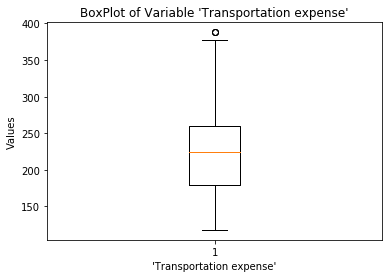

In [34]:
# Ploting BoxPlot of continuous variables
plt.boxplot(df['Transportation expense'])
plt.xlabel("'Transportation expense'")
plt.title("BoxPlot of Variable 'Transportation expense'")
plt.ylabel('Values')

Text(0,0.5,'Values')

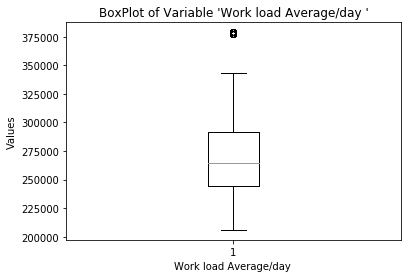

In [35]:
plt.boxplot(df['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0,0.5,'Values')

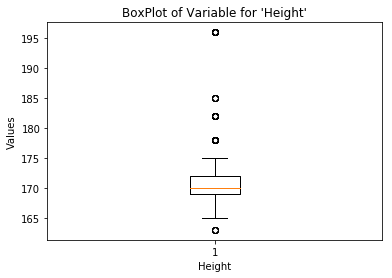

In [36]:
plt.boxplot(df['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')

Text(0,0.5,'Values')

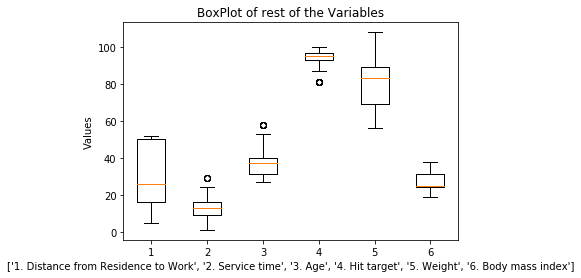

In [37]:
plt.boxplot([ df['Distance from Residence to Work'], df['Service time'], df['Age'], df['Hit target'], df['Weight'], df['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [38]:
# From the above boxplot we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
# there is no outlier

In [39]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

# Looping over all continuou variables to detect and remove Outliers
for i in continuous_vars:
    # Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Imputing missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.184
Imputing row 101/718 with 0 missing, elapsed time: 0.186
Imputing row 201/718 with 1 missing, elapsed time: 0.187
Imputing row 301/718 with 0 missing, elapsed time: 0.190
Imputing row 401/718 with 0 missing, elapsed time: 0.191
Imputing row 501/718 with 0 missing, elapsed time: 0.193
Imputing row 601/718 with 2 missing, elapsed time: 0.194
Imputing row 701/718 with 0 missing, elapsed time: 0.196


0

# Feature selection

In [40]:
##Correlation analysis for continuous variables
#Correlation plot
df_corr = df.loc[:,continuous_vars]

[]

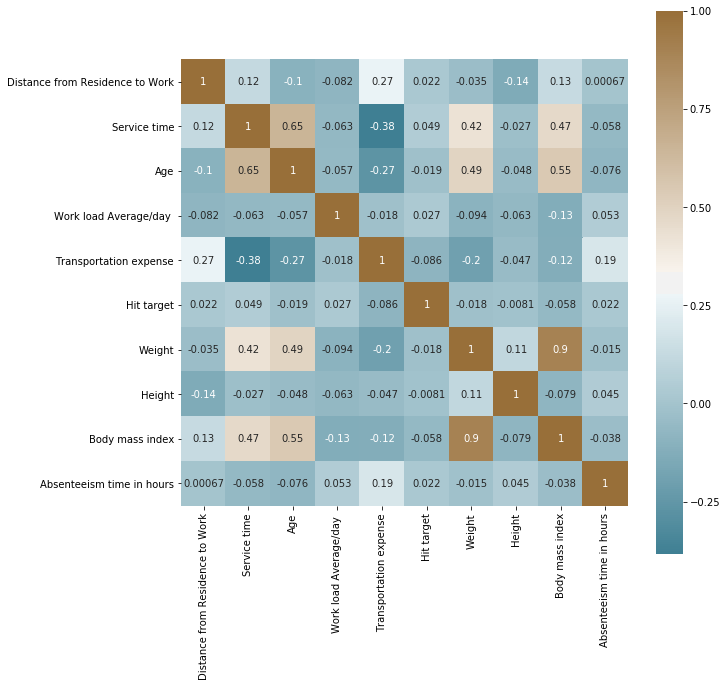

In [41]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [42]:
#loop for ANOVA test Since the target variable is continuous
for i in categorical_vars:
    f, p = stats.f_oneway(df[i], df["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 8.449881295013552e-167
P value for variable Reason for absence is 9.770767089088417e-277
P value for variable Month of absence is 3.3124782278857673e-25
P value for variable Day of the week is 0.0008188161594849071
P value for variable Seasons is 3.127506937786291e-40
P value for variable Disciplinary failure is 1.2189432024253421e-185
P value for variable Education is 8.375003325123203e-105
P value for variable Social drinker is 1.2794395762714786e-150
P value for variable Social smoker is 9.117849965003895e-184
P value for variable Pet is 5.325984030592952e-127
P value for variable Son is 9.45269711512623e-116


In [43]:
# Droping the variables which has redundant information
to_drop = ['Weight']
df = df.drop(to_drop, axis = 1)

In [44]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_vars = [i for i in continuous_vars if i not in to_drop]
categorical_vars = [i for i in categorical_vars if i not in to_drop]

In [45]:
clean_data = df.copy()

# Feature scaling

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


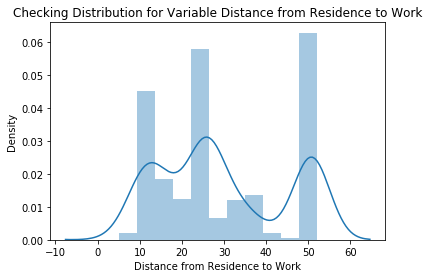

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


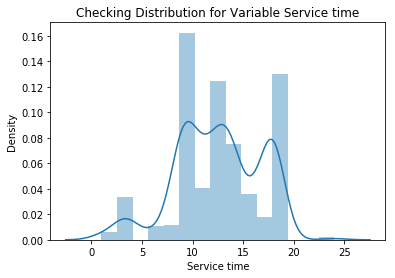

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


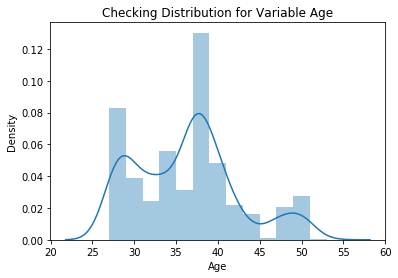

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


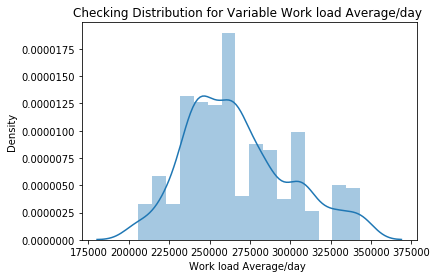

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


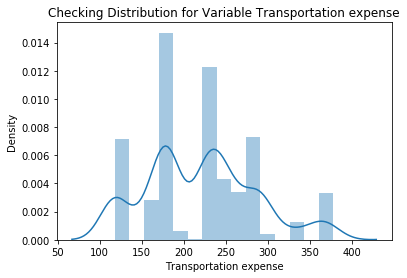

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


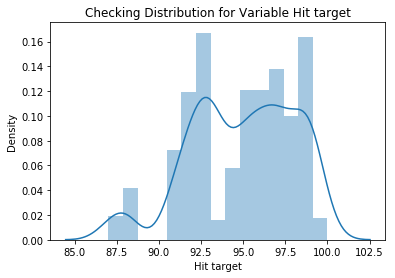

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


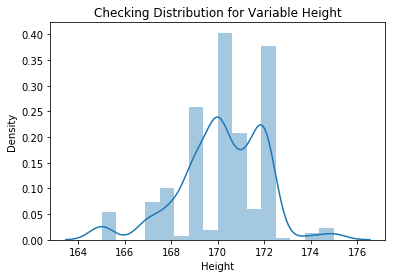

C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


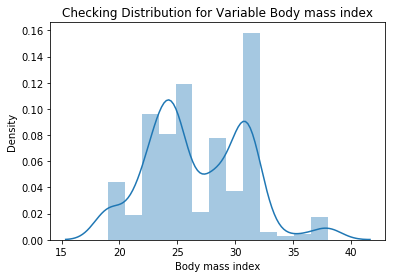

In [46]:
# Checking if there is any normally distributed variable in data
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [47]:
# Since there is no normally distributed curve we will use Normalizationg for Feature Scalling
# #Normalization
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [48]:
# Get dummy variables for categorical variables
df = pd.get_dummies(data = df, columns = categorical_vars)

# Copying dataframe
df1 = df.copy()

In [49]:
df.iloc[:,8].head()

0    4.0
1    0.0
2    2.0
3    4.0
4    2.0
Name: Absenteeism time in hours, dtype: float64

In [50]:
df.iloc[:, df.columns != 'Absenteeism time in hours'].head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,ID_1.0,ID_2.0,...,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_1.0000000034808583,Son_2.0,Son_2.000000090044646,Son_3.0,Son_3.9575535615568516,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.500001,0.631579,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.300000,0.263158,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0,0,...,0,0,0,0,0,1,0,0,0,0


# Model building

In [51]:
# Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, 8], test_size = 0.20)

In [52]:
#Decision tree
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 3.02269194911261
Root Mean Squared Error For Test data = 3.546863317032265
R^2 Score(coefficient of determination) = 0.09240697404327358


In [53]:
#Random forest
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.0191379196071344
Root Mean Squared Error For Test data = 2.901960307126924
R^2 Score(coefficient of determination) = 0.39244558601183477


In [54]:
#Linear regression
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.2721081490323445
Root Mean Squared Error For Test data = 687721341572.2847
R^2 Score(coefficient of determination) = -3.4121431908799683e+22


In [55]:
#Gradient boosting
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.014628735979738
Root Mean Squared Error For Test data = 2.8417397185994266
R^2 Score(coefficient of determination) = 0.41739951818166277


# Dimensionality Reduction using PCA

In [56]:
target = df['Absenteeism time in hours']

In [57]:
df.drop(['Absenteeism time in hours'], inplace = True, axis=1)
df.shape

(718, 129)

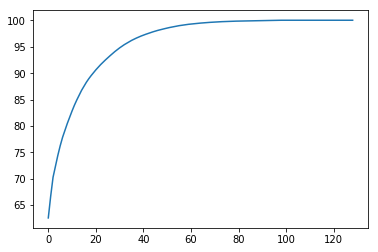

In [58]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = df1.values

# Data has 129 variables so no of components of PCA = 129
pca = PCA(n_components=129)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [59]:
# From the above plot selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

In [60]:
#Decision tree
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.5776089972230519
Root Mean Squared Error For Test data = 0.548946129724924
R^2 Score(coefficient of determination) = 0.9762724038849956


In [61]:
#Random forest
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.03468988323820037
Root Mean Squared Error For Test data = 0.03160814875759361
R^2 Score(coefficient of determination) = 0.9999213330327781


In [62]:
#Linear regression
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.713980449705697e-15
Root Mean Squared Error For Test data = 0.0017955442842761923
R^2 Score(coefficient of determination) = 0.9999997461445288


In [63]:
# Importing library for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.0010575363028825003
Root Mean Squared Error For Test data = 0.00920187766404611
R^2 Score(coefficient of determination) = 0.9999933327429903
